11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training samples: (60000, 28, 28, 1), Test samples: (10000, 28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.8942 - loss: 0.3423 - val_accuracy: 0.9832 - val_loss: 0.0569
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9828 - loss: 0.0562 - val_accuracy: 0.9887 - val_loss: 0.0379
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9892 - loss: 0.0347 - val_accuracy: 0.9912 - val_loss: 0.0334
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9917 - loss: 0.0267 - val_accuracy: 0.9907 - val_loss: 0.0358
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9942 - loss: 0.0191 - val_accuracy: 0.9898 - val_loss: 0.0394
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9870 - loss: 0.0397

✅ Test Accuracy: 98.91%


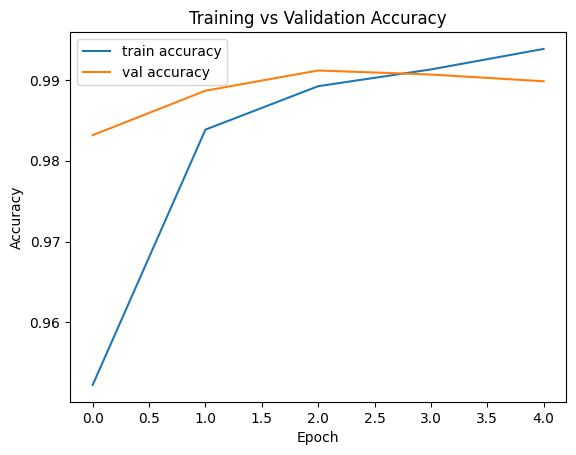

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


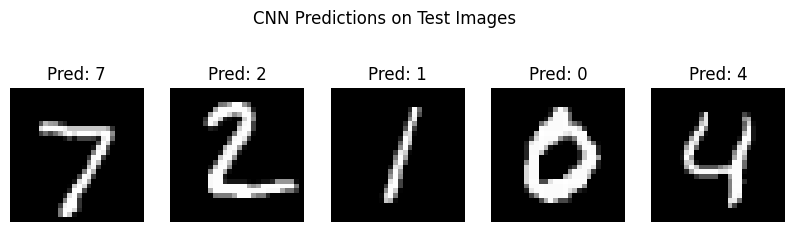

In [1]:
# mnist_cnn_classifier.ipynb

# 📌 Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# 📊 Step 2: Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# ⚙️ Step 3: Normalize the data and reshape
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Add a channel dimension: (28, 28) → (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(f"Training samples: {X_train.shape}, Test samples: {X_test.shape}")

# 🧠 Step 4: Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits
])

# ⚙️ Step 5: Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 🏃 Step 6: Train model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# ✅ Step 7: Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# 📈 Step 8: Plot accuracy graph
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 🔍 Step 9: Predict 5 test samples and visualize
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis("off")
plt.suptitle("CNN Predictions on Test Images")
plt.show()
